Summary Statistics (Percentage)
Mean: 75.373176
Standard Deviation: 13.274349385526358


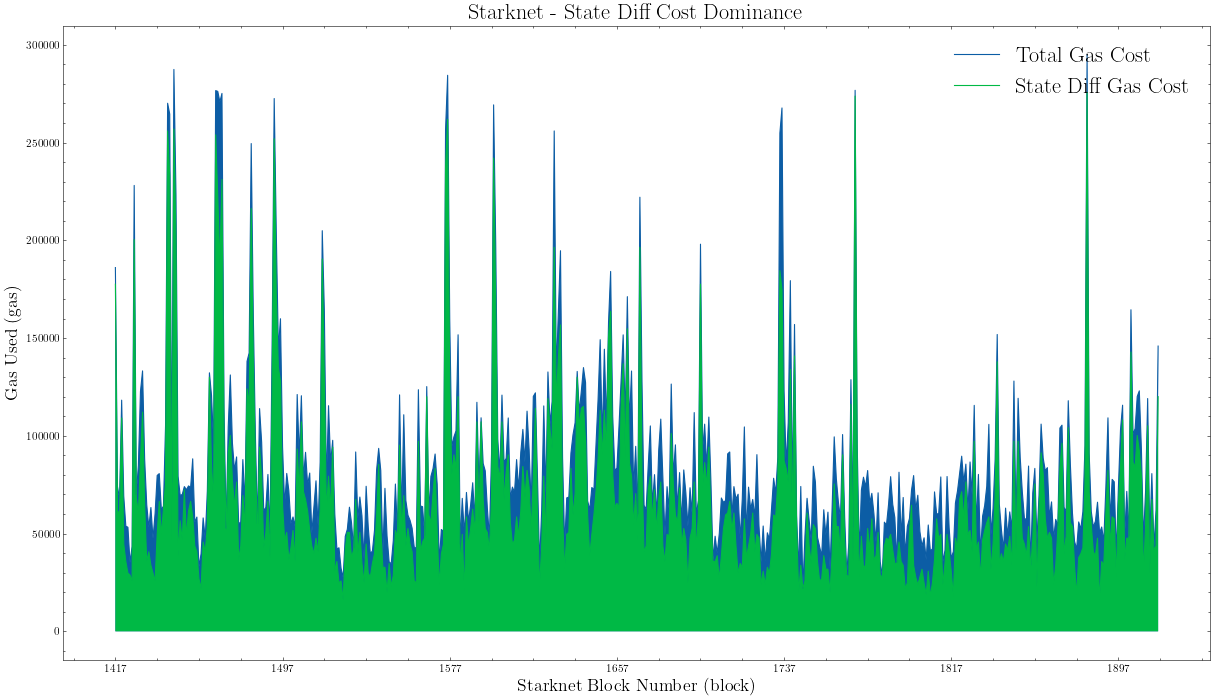

In [10]:
import matplotlib.pyplot as plt
import json
import numpy as np
import matplotlib
from matplotlib.pyplot import figure
matplotlib.rcParams['text.usetex'] = True
plt.style.use('science')

with open("../data/starknetPercentage500.json", "r") as f:
    data = json.load(f)

#blockNo -> [timestamp, txs, l2_cost, total_cost, l1_data/total_cost]
x_ts = []
y_diffs = []
y_total = []
percentage = []

for ts in data:
    x_ts.append(ts)
    y_diffs.append(data[ts][2])
    y_total.append(float(data[ts][4]))
    percentage.append(float(data[ts][5]) * 100)
    
print("Summary Statistics (Percentage)")
print("Mean:", np.mean(percentage))
print("Standard Deviation:", np.std(percentage))

fig,ax = plt.subplots(figsize=(18.5, 10.5), dpi=80)

# Plot the data
data_line = ax.plot(x_ts , y_total, label='Total Gas Cost')
plt.fill_between(x_ts, y_total)
# Plot the data
data_line = ax.plot(x_ts , y_diffs, label='State Diff Gas Cost')
plt.fill_between(x_ts, y_diffs)

# Make a legend
legend = ax.legend(loc='upper right', fontsize=20)

plt.title("Starknet - State Diff Cost Dominance", fontsize = 20)
plt.xlabel("Starknet Block Number (block)", fontsize=16)
plt.ylabel("Gas Used (gas)", fontsize=16)

ax.xaxis.set_major_locator(plt.MaxNLocator(9))

plt.show()
